Load and Explore the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV file
df1 = pd.read_csv("PRODUCTS_TAKEHOME.csv", )

# Display the first few rows
print(df1.head())

# Get basic info about data
print(df1.info())

# Check for missing values
##print(df1.isnull().sum())

          CATEGORY_1              CATEGORY_2                   CATEGORY_3  \
0  Health & Wellness           Sexual Health  Conductivity Gels & Lotions   
1             Snacks           Puffed Snacks         Cheese Curls & Puffs   
2  Health & Wellness               Hair Care        Hair Care Accessories   
3  Health & Wellness               Oral Care                   Toothpaste   
4  Health & Wellness  Medicines & Treatments               Essential Oils   

  CATEGORY_4                                       MANUFACTURER  \
0        NaN                                                NaN   
1        NaN                                                NaN   
2        NaN                           PLACEHOLDER MANUFACTURER   
3        NaN                                  COLGATE-PALMOLIVE   
4        NaN  MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...   

             BRAND       BARCODE  
0              NaN  7.964944e+11  
1              NaN  2.327801e+10  
2          ELECSOP  4.618178e

Identify Data Quality Issues

In [2]:
# Check for duplicates
print(f"Duplicate rows: {df1.duplicated().sum()}")

# Remove duplicates
df1_cleaned = df1.drop_duplicates()


Duplicate rows: 215


Inconsistent formatting

In [15]:
for col in df1.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}: {df1[col].unique()}")

Unique values in CATEGORY_1: ['Health & Wellness' 'Snacks' 'Beverages' 'Pantry' 'Alcohol'
 'Apparel & Accessories' 'Restaurant' 'Needs Review' 'Dairy'
 'Home & Garden' nan 'Household Supplies' 'Meat & Seafood' 'Deli & Bakery'
 'Sporting Goods' 'Produce' 'Office & School' 'Frozen'
 'Arts & Entertainment' 'Animals & Pet Supplies' 'Electronics' 'Beauty'
 'Toys & Games' 'Mature' 'Vehicles & Parts' 'Baby & Toddler'
 'Luggage & Bags' 'Media']
Unique values in CATEGORY_2: ['Sexual Health' 'Puffed Snacks' 'Hair Care' 'Oral Care'
 'Medicines & Treatments' 'Deodorant & Antiperspirant' 'Snack Bars' nan
 'Bath & Body' 'Nuts & Seeds' 'Candy' 'Cookies' 'Variety Snack Packs'
 'Hair Removal' 'Medical Supplies & Equipment' 'Chips' 'Snack Cakes'
 'Skin Care' 'Dessert Toppings' 'Eye Care' 'Fruit & Vegetable Snacks'
 'Snack Mixes' 'Crackers' 'Jerky & Dried Meat'
 'Topical Muscle & Joint Relief Treatments' 'Foot Care' 'First Aid'
 'Ear Care' 'Menstrual Care' 'Pretzels' 'Trail Mix' 'Dips & Salsa'
 'Adult In

Using Visualization to detect anamolies

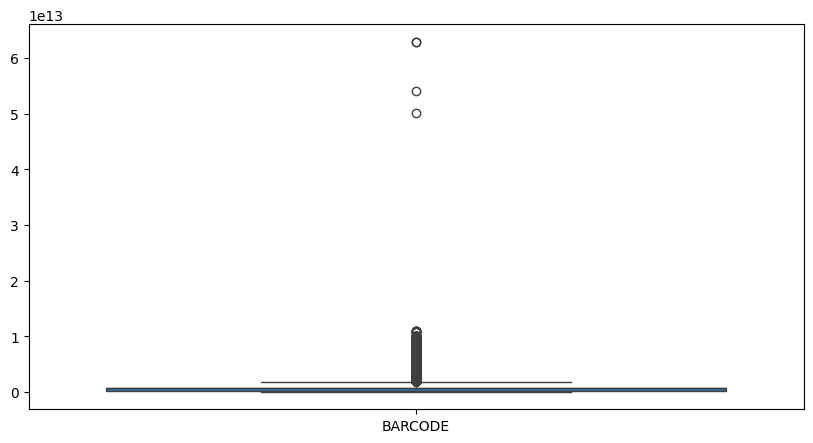

In [16]:
# Check for outliers in numerical columns
plt.figure(figsize=(10,5))
sns.boxplot(data=df1.select_dtypes(include=['number']))
plt.show()

Identifying fields that are bit difficult to understand and check if column names are clear and self-explanatory also look for encoded values or abbreviations that might need decoding.

In [17]:
print(df1.columns)

# Identify numerical columns that should be categorical
for col in df1.select_dtypes(include=['number']).columns:
    print(f"{col} - Unique values: {df1[col].nunique()}")

Index(['CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4', 'MANUFACTURER',
       'BRAND', 'BARCODE'],
      dtype='object')
BARCODE - Unique values: 841342


The output suggests the following observations:

Column Names Clarity:

The columns CATEGORY_1, CATEGORY_2, CATEGORY_3, and CATEGORY_4 likely represent hierarchical classifications of products. However, without documentation, their exact meaning is unclear.
MANUFACTURER and BRAND are self-explanatory, indicating the company producing and marketing the product.
BARCODE represents a unique identifier for products, commonly used in inventory management.

Potential Issues with Data Understanding:

The hierarchical category structure (CATEGORY_1 to CATEGORY_4) may need further clarification—do they represent subcategories, regions, or product types?
BARCODE has 841,342 unique values, meaning almost every product has a distinct barcode. If duplicates exist, it could indicate data issues.
Encoded values: If any column contains numerical codes instead of descriptive text, a reference table may be required to interpret them.